#Note dataframe: 
- data: dataset ban đầu 
- data2: dataset ban đầu có lọc trùng sale
- promsing: dataset chứa group of promising customer 
- prominsing_unique: dataset chứa group of promising customer có lọc sale
- fre,re,mon: dataset chứa frequency, recency, monetary score
- rfm: dataset frm
- payment: dataset có cluster + danh sách khách hàng+ sản phẩm,...
- all_in_one: Dataset có đầy đủ tất cả thông tin

In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Ecommerce Dataset.xlsx - Ecommerce Data.csv')
data

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID
0,379040,complete,1/1/2017,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115
1,379041,complete,1/1/2017,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115
2,379042,complete,1/1/2017,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30116
3,379044,complete,1/1/2017,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531
4,379045,complete,1/1/2017,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,12/31/2017,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402
290916,724053,canceled,12/31/2017,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-10,Dec-17,62383
290917,724056,canceled,12/31/2017,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,\N,292.1,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025
290918,724057,canceled,12/31/2017,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,\N,7.9,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025


<H2> Data cleaning:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290920 entries, 0 to 290919
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                290920 non-null  int64  
 1   status                 290920 non-null  object 
 2   created_at             290920 non-null  object 
 3   sku                    290908 non-null  object 
 4   price                  290920 non-null  float64
 5   qty_ordered            290920 non-null  int64  
 6   grand_total            290920 non-null  float64
 7   increment_id           290920 non-null  object 
 8   category_name_1        290920 non-null  object 
 9   sales_commission_code  290906 non-null  object 
 10  discount_amount        290920 non-null  float64
 11  payment_method         290920 non-null  object 
 12  Working Date           290920 non-null  object 
 13  BI Status              290920 non-null  object 
 14  Year                   290920 non-nu

In [4]:
data['status'].unique()

array(['complete', 'order_refunded', 'canceled', 'refund', 'received',
       'closed', 'fraud', 'pending_paypal', 'paid', '\\N', 'cod'],
      dtype=object)

In [5]:
#Check unique key: 
data['item_id'].drop_duplicates().count()
#item_id là unique key

290920

In [6]:
data.drop_duplicates()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID
0,379040,complete,1/1/2017,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115
1,379041,complete,1/1/2017,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115
2,379042,complete,1/1/2017,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30116
3,379044,complete,1/1/2017,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531
4,379045,complete,1/1/2017,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,12/31/2017,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402
290916,724053,canceled,12/31/2017,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-10,Dec-17,62383
290917,724056,canceled,12/31/2017,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,\N,292.1,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025
290918,724057,canceled,12/31/2017,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,\N,7.9,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025


<H3> Group status for easier analysis:

In [7]:
complete = data['status'].isin(['complete','received','cod','paid','closed','exchange'])
canceled = data['status'].isin(['canceled','order_refunded','refund','fraud'])
pending = data['status'].isin(['payment_review','pending','processing','holded','pending_paypal'])

In [8]:
def payment_check(row): 
    if row['status'] =='complete': 
        return 'completed'
    elif row['status'] == 'received':
        return 'completed'
    elif row['status'] == 'received':
        return 'completed'
    elif row['status'] == 'paid':
        return 'completed'
    elif row['status'] == 'closed':
        return 'completed'
    elif row['status'] == 'exchange': 
        return 'completed'
    elif row['status'] == 'canceled':
        return 'canceled'
    elif row['status'] == 'order_refunded':
        return 'canceled'
    elif row['status'] == 'refund':
        return 'canceled'
    elif row['status'] == 'fraud': 
        return 'canceled'
    else: return 'pending'

In [9]:
data.apply(payment_check, axis=1)

0         completed
1         completed
2         completed
3         completed
4         completed
            ...    
290915     canceled
290916     canceled
290917     canceled
290918     canceled
290919     canceled
Length: 290920, dtype: object

In [10]:
data['new_payment_status'] = data.apply(payment_check, axis=1)
data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID,new_payment_status
0,379040,complete,1/1/2017,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115,completed
1,379041,complete,1/1/2017,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115,completed
2,379042,complete,1/1/2017,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30116,completed
3,379044,complete,1/1/2017,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531,completed
4,379045,complete,1/1/2017,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,12/31/2017,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402,canceled
290916,724053,canceled,12/31/2017,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-10,Dec-17,62383,canceled
290917,724056,canceled,12/31/2017,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,\N,292.1,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025,canceled
290918,724057,canceled,12/31/2017,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,\N,7.9,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025,canceled


<H1> I. RFM analysis:

<H3> 1.Recency: 

In [11]:
data.sort_values( by = 'Customer ID', ascending =True)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID,new_payment_status
76228,473370,complete,5/19/2017,ALHAMRA_US-0961-K,299.0,1,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,2017,5,2016-7,May-17,3,completed
76230,473372,complete,5/19/2017,BD_BIG DEAL_16,350.0,1,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,2017,5,2016-7,May-17,3,completed
76229,473371,complete,5/19/2017,e-seller_7,66.0,1,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,2017,5,2016-7,May-17,3,completed
76227,473369,complete,5/19/2017,BT_BT-422,530.0,1,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,2017,5,2016-7,May-17,3,completed
16366,400714,canceled,2/8/2017,IDROID_BALRX7-Gold,9499.0,1,9499.0,100267628,Mobiles & Tablets,R-FSD-52352,0.0,Payaxis,2/8/2017,Gross,2017,2,2016-7,Feb-17,4,canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290899,724024,complete,12/31/2017,KAR59E85C530A6C4,799.0,1,1397.0,100441590,Superstore,\N,0.0,cod,12/31/2017,Net,2017,12,2017-12,Dec-17,84400,completed
290900,724025,complete,12/31/2017,KAR59E85C9B0DFD3,199.0,1,1397.0,100441590,Superstore,\N,0.0,cod,12/31/2017,Net,2017,12,2017-12,Dec-17,84400,completed
290901,724026,complete,12/31/2017,KAR59E85CA11E740,399.0,1,1397.0,100441590,Superstore,\N,0.0,cod,12/31/2017,Net,2017,12,2017-12,Dec-17,84400,completed
290902,724027,order_refunded,12/31/2017,KABRUB59ACAE1948102,89.0,1,239.0,100441591,Kids & Baby,\N,0.0,cod,12/31/2017,Valid,2017,12,2017-12,Dec-17,84401,canceled


In [12]:
#Day max in this research: 
data['created_at'] = pd.to_datetime(data['created_at'])
day_max = pd.to_datetime(data['created_at'].max())
day_max

Timestamp('2017-12-31 00:00:00')

In [13]:
#Day since last order of every customer: 
recen = data.groupby('Customer ID')['created_at'].max().to_frame().\
reset_index().rename(columns = {'created_at':'last_day'})
recen['last_day'] = pd.to_datetime(recen['last_day']) 
recen['recen_day'] = day_max - recen['last_day']
recen

,Customer ID,last_day,recen_day
0,3,2017-05-19,226 days
1,4,2017-12-28,3 days
2,7,2017-04-15,260 days
3,11,2017-02-14,320 days
4,13,2017-01-10,355 days
...,...,...,...
61952,84398,2017-12-31,0 days
61953,84399,2017-12-31,0 days
61954,84400,2017-12-31,0 days
61955,84401,2017-12-31,0 days


In [14]:
#Recency score: 
recen['recency_score'] = recen['recen_day'].rank(pct=True, ascending = True)*10
recen['recency_score'] = recen['recency_score'].astype(int)
recen

,Customer ID,last_day,recen_day,recency_score
0,3,2017-05-19,226 days,7
1,4,2017-12-28,3 days,0
2,7,2017-04-15,260 days,8
3,11,2017-02-14,320 days,9
4,13,2017-01-10,355 days,9
...,...,...,...,...
61952,84398,2017-12-31,0 days,0
61953,84399,2017-12-31,0 days,0
61954,84400,2017-12-31,0 days,0
61955,84401,2017-12-31,0 days,0


In [15]:
recen.loc[recen['recency_score']==10]

,Customer ID,last_day,recen_day,recency_score


<H3> 2.Frequency

In [16]:
data2=data

In [17]:
data2 = data2[~data2['increment_id'].duplicated()]
data2

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID,new_payment_status
0,379040,complete,2017-01-01,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115,completed
2,379042,complete,2017-01-01,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30116,completed
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531,completed
5,379046,complete,2017-01-01,Paramount_9789696371342,395.0,1,395.0,100255237,School & Education,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30117,completed
6,379047,complete,2017-01-01,Infinix-Hot-S-Grey,16899.0,1,15899.0,100255238,Mobiles & Tablets,HDD 105640,1000.0,Payaxis,1/1/2017,Net,2017,1,2017-1,Jan-17,30118,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290914,724040,canceled,2017-12-31,COMKIN5A0C4788898C0,1562.0,1,1562.0,100441598,Computing,CMUX33202,0.0,cod,12/31/2017,Gross,2017,12,2017-11,Dec-17,74648,canceled
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402,canceled
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-10,Dec-17,62383,canceled
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,\N,292.1,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025,canceled


In [18]:
#Điểm frequency đếm trên số lần đặt hàng theo từng customer ID:
fre =data2.groupby('Customer ID')['increment_id'].count().\
to_frame().reset_index().rename(columns ={'increment_id':'count of others'})
fre

,Customer ID,count of others
0,3,1
1,4,126
2,7,3
3,11,1
4,13,1
...,...,...
61952,84398,1
61953,84399,1
61954,84400,1
61955,84401,1


In [19]:
fre['frequency_score'] = fre['count of others'].rank(pct=True, ascending = True)*10
fre['frequency_score'] = fre['frequency_score'].astype(int)
fre

,Customer ID,count of others,frequency_score
0,3,1,2
1,4,126,9
2,7,3,7
3,11,1,2
4,13,1,2
...,...,...,...
61952,84398,1,2
61953,84399,1,2
61954,84400,1,2
61955,84401,1,2


In [20]:
fre.loc[fre['frequency_score']==10]

,Customer ID,count of others,frequency_score
8579,31025,747,10


<H3> 3.Monetary:

In [21]:
mon = data2.groupby('Customer ID')['grand_total'].sum().to_frame().reset_index()
mon

,Customer ID,grand_total
0,3,1245.00
1,4,1137610.85
2,7,45.00
3,11,315.00
4,13,350.00
...,...,...
61952,84398,2086.00
61953,84399,870.00
61954,84400,1397.00
61955,84401,239.00


In [22]:
mon['monetary_score'] = mon['grand_total'].rank(pct=True)*10
mon['monetary_score'] = mon['monetary_score'].astype(int)
mon

,Customer ID,grand_total,monetary_score
0,3,1245.00,2
1,4,1137610.85,9
2,7,45.00,0
3,11,315.00,0
4,13,350.00,0
...,...,...,...
61952,84398,2086.00,3
61953,84399,870.00,1
61954,84400,1397.00,2
61955,84401,239.00,0


In [23]:
mon.loc[mon['monetary_score'] == 10]

,Customer ID,grand_total,monetary_score
1297,5032,36059884.6,10


In [24]:
data2.sort_values(by='Customer ID', ascending=False)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID,new_payment_status
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402,canceled
290902,724027,order_refunded,2017-12-31,KABRUB59ACAE1948102,89.0,1,239.0,100441591,Kids & Baby,\N,0.0,cod,12/31/2017,Valid,2017,12,2017-12,Dec-17,84401,canceled
290899,724024,complete,2017-12-31,KAR59E85C530A6C4,799.0,1,1397.0,100441590,Superstore,\N,0.0,cod,12/31/2017,Net,2017,12,2017-12,Dec-17,84400,completed
290889,724013,complete,2017-12-31,MATBIG59AC913C09C0B,720.0,1,870.0,100441581,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Net,2017,12,2017-12,Dec-17,84399,completed
290875,723996,canceled,2017-12-31,WOF10059ED915391BB5,449.0,1,2086.0,100441574,Women's Fashion,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84398,canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195608,610336,complete,2017-11-10,MEFBNB59FC750A109F3,499.0,1,1246.0,100377141,Men's Fashion,R-FSD-52352,0.0,cod,11/10/2017,Net,2017,11,2016-7,Nov-17,4,completed
31171,419720,complete,2017-03-11,RB_HouseholdBundle,1000.0,3,3000.0,100278164,Superstore,R-FSD-52352,0.0,cod,3/11/2017,Net,2017,3,2016-7,Mar-17,4,completed
28263,416155,complete,2017-03-07,Nimcos_Gathia-200gm,110.0,2,1019.0,100276258,Soghaat,R-FSD-52352,0.0,cod,3/7/2017,Net,2017,3,2016-7,Mar-17,4,completed
18550,403699,canceled,2017-02-13,IDROID_BALRX7-Gold,9499.0,1,9499.0,100269233,Mobiles & Tablets,R-FSD-52352,0.0,Payaxis,2/13/2017,Gross,2017,2,2016-7,Feb-17,4,canceled


<H3> RFM Score and Customer Cluster:

In [25]:
#merge RFM table together:
rfm = pd.merge(recen, mon, how='inner',on='Customer ID')
rfm = pd.merge(rfm,fre, how='inner', on='Customer ID')
rfm['total_score'] = rfm['recency_score'] +rfm['monetary_score'] + rfm['frequency_score'] 
rfm.drop(columns ={'last_day','recen_day','grand_total','count of others'})

,Customer ID,recency_score,monetary_score,frequency_score,total_score
0,3,7,2,2,11
1,4,0,9,9,18
2,7,8,0,7,15
3,11,9,0,2,11
4,13,9,0,2,11
...,...,...,...,...,...
61952,84398,0,3,2,5
61953,84399,0,1,2,3
61954,84400,0,2,2,4
61955,84401,0,0,2,2


In [26]:
rfm['cluster'] =" "

In [27]:
#customer clustering: 
for i in rfm.index: 
    if rfm['total_score'][i] == 27: 
        rfm['cluster'][i] = 'Champion'
    elif rfm['total_score'][i] >= 21: 
        rfm['cluster'][i] ='Loyal Customer'
    elif rfm['total_score'][i] >= 16: 
        rfm['cluster'][i] ='Promising Customer'
    elif rfm['total_score'][i] >= 4: 
        rfm['cluster'][i] = 'At risk'
    else: rfm['cluster'][i] = 'Lost customer'
rfm

<ipython-input-27-886d0276168a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cluster'][i] = 'At risk'
<ipython-input-27-886d0276168a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cluster'][i] ='Promising Customer'
<ipython-input-27-886d0276168a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cluster'][i] ='Loyal Customer'
<ipython-input-27-886d0276168a>:11: SettingWithCopyWarning: 
A value is trying to be set 

,Customer ID,last_day,recen_day,recency_score,grand_total,monetary_score,count of others,frequency_score,total_score,cluster
0,3,2017-05-19,226 days,7,1245.00,2,1,2,11,At risk
1,4,2017-12-28,3 days,0,1137610.85,9,126,9,18,Promising Customer
2,7,2017-04-15,260 days,8,45.00,0,3,7,15,At risk
3,11,2017-02-14,320 days,9,315.00,0,1,2,11,At risk
4,13,2017-01-10,355 days,9,350.00,0,1,2,11,At risk
...,...,...,...,...,...,...,...,...,...,...
61952,84398,2017-12-31,0 days,0,2086.00,3,1,2,5,At risk
61953,84399,2017-12-31,0 days,0,870.00,1,1,2,3,Lost customer
61954,84400,2017-12-31,0 days,0,1397.00,2,1,2,4,At risk
61955,84401,2017-12-31,0 days,0,239.00,0,1,2,2,Lost customer


In [28]:
#Save rfm file to excel: 
#rfm.to_excel('rfm.xlsx', index =False)

<H3> Percantage of each cluster:

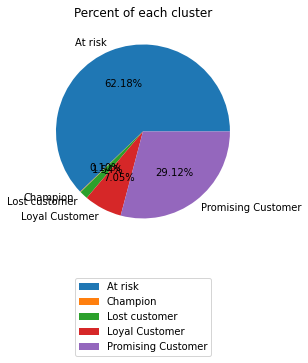

In [29]:
#Count number of customer in each cluster: 
percen = rfm.groupby('cluster')['Customer ID'].count().to_frame().reset_index().\
rename(columns={'Customer ID':'Count of Customer'})
#Draw chart to have the percantage: 
plt.pie(percen['Count of Customer'],autopct='%1.2f%%', labels = percen['cluster'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Percent of each cluster')
plt.show()

In [30]:
percen

,cluster,Count of Customer
0,At risk,38524
1,Champion,65
2,Lost customer,956
3,Loyal Customer,4368
4,Promising Customer,18044


<H3> RFM score in each cluster:

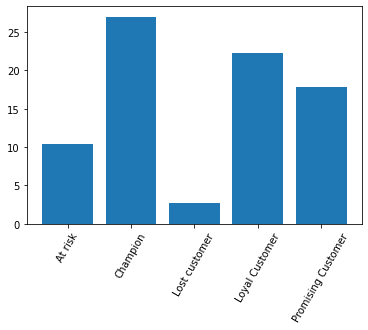

In [31]:
#Calculate the score
score = rfm.groupby('cluster')['total_score'].mean().to_frame().reset_index().\
rename(columns ={'total_score':'average score'})
#Draw table of the score:
plt.bar(score['cluster'],score['average score'], align ='center')
plt.xticks(rotation =60)
plt.show()

In [32]:
pd.pivot_table(rfm, index='cluster', values = ['total_score','frequency_score','monetary_score','recency_score'])

,frequency_score,monetary_score,recency_score,total_score
cluster,,,,
At risk,2.905332,3.137369,4.414703,10.457403
Champion,9.000000,9.000000,9.000000,27.000000
Lost customer,2.000000,0.405858,0.248954,2.654812
Loyal Customer,7.963599,7.869048,6.470696,22.303342
Promising Customer,6.576591,6.802150,4.421858,17.800599


<H1> II.Analysis to find Insight: 

<H3> What is the payment method of each cluster?

In [33]:
data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,Year,Month,Customer Since,M-Y,Customer ID,new_payment_status
0,379040,complete,2017-01-01,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115,completed
1,379041,complete,2017-01-01,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30115,completed
2,379042,complete,2017-01-01,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,\N,0.0,cod,1/1/2017,Net,2017,1,2017-1,Jan-17,30116,completed
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531,completed
4,379045,complete,2017-01-01,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,\N,0.0,cod,1/1/2017,Net,2017,1,2016-11,Jan-17,15531,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-12,Dec-17,84402,canceled
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,\N,0.0,cod,12/31/2017,Gross,2017,12,2017-10,Dec-17,62383,canceled
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,\N,292.1,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025,canceled
290918,724057,canceled,2017-12-31,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,\N,7.9,Easypay_MA,12/31/2017,Gross,2017,12,2016-11,Dec-17,14025,canceled


In [34]:
#marge rfm and data to have the cluster and payment method in the same dataset:
payment = pd.merge(data, rfm, how ='inner', on='Customer ID')
payment = payment.drop(['sku','sales_commission_code','last_day','grand_total_y','Working Date','BI Status','Year','Month',
                       'Customer Since','M-Y'],axis=1)
payment

,item_id,status,created_at,price,qty_ordered,grand_total_x,increment_id,category_name_1,discount_amount,payment_method,Customer ID,new_payment_status,recen_day,recency_score,monetary_score,count of others,frequency_score,total_score,cluster
0,379040,complete,2017-01-01,825.0,1,1185.0,100255234,Home & Living,0.0,cod,30115,completed,364 days,9,2,1,2,13,At risk
1,379041,complete,2017-01-01,360.0,1,1185.0,100255234,Home & Living,0.0,cod,30115,completed,364 days,9,2,1,2,13,At risk
2,379042,complete,2017-01-01,799.0,1,799.0,100255235,Men's Fashion,0.0,cod,30116,completed,364 days,9,1,1,2,12,At risk
3,379044,complete,2017-01-01,250.0,1,599.0,100255236,Kids & Baby,0.0,cod,15531,completed,7 days,0,8,22,9,17,Promising Customer
4,379045,complete,2017-01-01,349.0,1,599.0,100255236,School & Education,0.0,cod,15531,completed,7 days,0,8,22,9,17,Promising Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724024,complete,2017-12-31,799.0,1,1397.0,100441590,Superstore,0.0,cod,84400,completed,0 days,0,2,1,2,4,At risk
290916,724025,complete,2017-12-31,199.0,1,1397.0,100441590,Superstore,0.0,cod,84400,completed,0 days,0,2,1,2,4,At risk
290917,724026,complete,2017-12-31,399.0,1,1397.0,100441590,Superstore,0.0,cod,84400,completed,0 days,0,2,1,2,4,At risk
290918,724027,order_refunded,2017-12-31,89.0,1,239.0,100441591,Kids & Baby,0.0,cod,84401,canceled,0 days,0,0,1,2,2,Lost customer


In [35]:
pivot_payment =pd.pivot_table(payment, values='Customer ID', index ='payment_method', columns = 'cluster', aggfunc='count').reset_index()
pivot_payment

cluster,payment_method,At risk,Champion,Lost customer,Loyal Customer,Promising Customer
0,Easypay,11456.0,NaN,112.0,9728.0,31363.0
1,Easypay_MA,1752.0,NaN,13.0,1104.0,5095.0
2,Payaxis,4088.0,876.0,2.0,20332.0,23638.0
3,bankalfalah,NaN,NaN,NaN,NaN,6.0
4,cashatdoorstep,1.0,NaN,NaN,15.0,26.0
5,cod,54847.0,134.0,959.0,22407.0,61640.0
6,customercredit,640.0,35.0,1.0,758.0,2021.0
7,easypay_voucher,3462.0,NaN,22.0,1821.0,17374.0
8,financesettlement,NaN,NaN,NaN,9.0,5.0
9,jazzvoucher,304.0,11.0,7.0,546.0,840.0


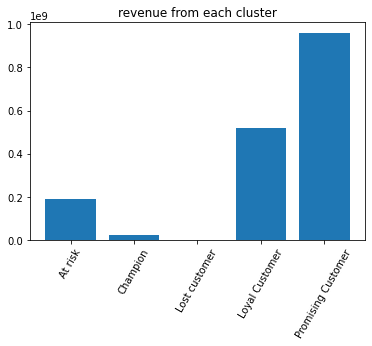

In [36]:
reve = rfm.groupby('cluster')['grand_total'].sum().to_frame().reset_index()
reve
plt.bar(reve['cluster'],reve['grand_total'])
plt.xticks(rotation =60)
plt.title('revenue from each cluster')
plt.show()

<H2> Analyse Promising Cluster: 

In [37]:
rfm

,Customer ID,last_day,recen_day,recency_score,grand_total,monetary_score,count of others,frequency_score,total_score,cluster
0,3,2017-05-19,226 days,7,1245.00,2,1,2,11,At risk
1,4,2017-12-28,3 days,0,1137610.85,9,126,9,18,Promising Customer
2,7,2017-04-15,260 days,8,45.00,0,3,7,15,At risk
3,11,2017-02-14,320 days,9,315.00,0,1,2,11,At risk
4,13,2017-01-10,355 days,9,350.00,0,1,2,11,At risk
...,...,...,...,...,...,...,...,...,...,...
61952,84398,2017-12-31,0 days,0,2086.00,3,1,2,5,At risk
61953,84399,2017-12-31,0 days,0,870.00,1,1,2,3,Lost customer
61954,84400,2017-12-31,0 days,0,1397.00,2,1,2,4,At risk
61955,84401,2017-12-31,0 days,0,239.00,0,1,2,2,Lost customer


              cluster  Count of Customer
0             At risk              38524
1            Champion                 65
2       Lost customer                956
3      Loyal Customer               4368
4  Promising Customer              18044


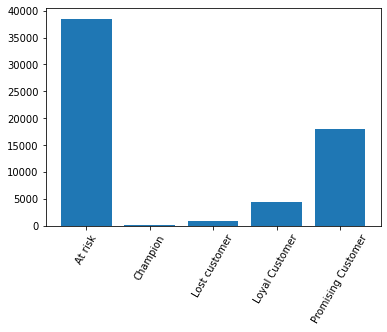

In [38]:
#count number of promising customers: 
print(percen)
#Visua: 
plt.bar(percen['cluster'],percen['Count of Customer'])
plt.xticks(rotation = 60) 
plt.show()

              cluster   grand_total
0             At risk  1.899104e+08
1            Champion  2.081999e+07
2       Lost customer  6.276770e+05
3      Loyal Customer  5.210289e+08
4  Promising Customer  9.614291e+08
Percent of revenue from Promising customer: 4    56.761129
Name: grand_total, dtype: float64


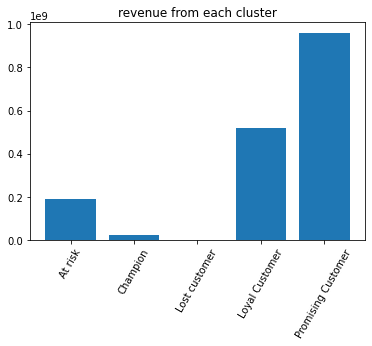

In [39]:
#Profit bring to the comapny: 
print(reve)
print('Percent of revenue from Promising customer:',reve['grand_total'].\
      loc[(reve['cluster'] =='Promising Customer')]/(reve['grand_total'].sum())*100)
#visuli:
reve = rfm.groupby('cluster')['grand_total'].sum().to_frame().reset_index()
plt.bar(reve['cluster'],reve['grand_total'])
plt.xticks(rotation =60)
plt.title('revenue from each cluster')
plt.show()

<H3> Most favorite categories: 

In [40]:
#Merge "RFM" and "data" dataframe to have the category and cluster in one dataframe: 
all_in_one = pd.merge(data, rfm, how ='left', on = "Customer ID")
all_in_one = all_in_one.drop(['sales_commission_code','Working Date','BI Status','Year',\
                            'Customer Since','M-Y','last_day','recen_day','grand_total_y'], axis=1)   
all_in_one

,item_id,status,created_at,sku,price,qty_ordered,grand_total_x,increment_id,category_name_1,discount_amount,payment_method,Month,Customer ID,new_payment_status,recency_score,monetary_score,count of others,frequency_score,total_score,cluster
0,379040,complete,2017-01-01,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,0.0,cod,1,30115,completed,9,2,1,2,13,At risk
1,379041,complete,2017-01-01,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,0.0,cod,1,30115,completed,9,2,1,2,13,At risk
2,379042,complete,2017-01-01,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,0.0,cod,1,30116,completed,9,1,1,2,12,At risk
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,0.0,cod,1,15531,completed,0,8,22,9,17,Promising Customer
4,379045,complete,2017-01-01,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,0.0,cod,1,15531,completed,0,8,22,9,17,Promising Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,0.0,cod,12,84402,canceled,0,6,1,2,8,At risk
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,0.0,cod,12,62383,canceled,0,9,76,9,18,Promising Customer
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,292.1,Easypay_MA,12,14025,canceled,0,9,24,9,18,Promising Customer
290918,724057,canceled,2017-12-31,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,7.9,Easypay_MA,12,14025,canceled,0,9,24,9,18,Promising Customer


<H3> Calculate AOV (average order value): 

In [41]:
all_in_one_uni = all_in_one[~all_in_one['increment_id'].duplicated()]
all_in_one_uni

,item_id,status,created_at,sku,price,qty_ordered,grand_total_x,increment_id,category_name_1,discount_amount,payment_method,Month,Customer ID,new_payment_status,recency_score,monetary_score,count of others,frequency_score,total_score,cluster
0,379040,complete,2017-01-01,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,0.0,cod,1,30115,completed,9,2,1,2,13,At risk
2,379042,complete,2017-01-01,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,0.0,cod,1,30116,completed,9,1,1,2,12,At risk
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,0.0,cod,1,15531,completed,0,8,22,9,17,Promising Customer
5,379046,complete,2017-01-01,Paramount_9789696371342,395.0,1,395.0,100255237,School & Education,0.0,cod,1,30117,completed,9,0,1,2,11,At risk
6,379047,complete,2017-01-01,Infinix-Hot-S-Grey,16899.0,1,15899.0,100255238,Mobiles & Tablets,1000.0,Payaxis,1,30118,completed,9,7,2,6,22,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290914,724040,canceled,2017-12-31,COMKIN5A0C4788898C0,1562.0,1,1562.0,100441598,Computing,0.0,cod,12,74648,canceled,0,8,5,8,16,Promising Customer
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,0.0,cod,12,84402,canceled,0,6,1,2,8,At risk
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,0.0,cod,12,62383,canceled,0,9,76,9,18,Promising Customer
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,292.1,Easypay_MA,12,14025,canceled,0,9,24,9,18,Promising Customer


In [42]:
#Sale amount: 
all_in_one['sale amount']=all_in_one.price*all_in_one.qty_ordered

In [43]:
print('revenue của các cluster')
all_in_one_uni.groupby('cluster')['grand_total_x'].sum()

revenue của các cluster


cluster
At risk               1.899104e+08
Champion              2.081999e+07
Lost customer         6.276770e+05
Loyal Customer        5.210289e+08
Promising Customer    9.614291e+08
Name: grand_total_x, dtype: float64

In [44]:
#save file all_in_one:
#all_in_one.to_excel('all-in_one.xlsx', index =False)

In [45]:
#Create promising data: 
promising = all_in_one

  new_payment_status  Customer ID
0           canceled       130895
1          completed       158393
2            pending         1632


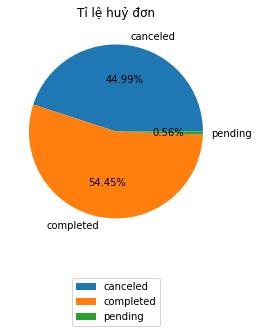

In [46]:
#Phần trăm huỷ đơn: 
payment_status = promising.groupby('new_payment_status')['Customer ID'].count().to_frame().reset_index()
print(payment_status)
#Visualize: 
plt.pie(payment_status['Customer ID'], autopct='%1.2f%%', labels = payment_status['new_payment_status'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Tỉ lệ huỷ đơn')
plt.show()

In [47]:
canceled

0         False
1         False
2         False
3         False
4         False
          ...  
290915     True
290916     True
290917     True
290918     True
290919     True
Name: status, Length: 290920, dtype: bool

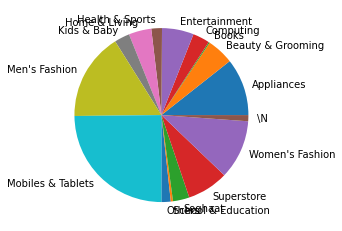

In [49]:
#Check lượng đơn huỷ đến từ đâu: 
canceled=promising.loc[promising['new_payment_status'] == 'canceled']
canceled_count=canceled.groupby('category_name_1')['item_id'].count().to_frame().reset_index()
canceled_count
#visualize: 
plt.pie(canceled_count['item_id'], labels = canceled_count['category_name_1'])
plt.show()

In [50]:
promising

,item_id,status,created_at,sku,price,qty_ordered,grand_total_x,increment_id,category_name_1,discount_amount,...,Month,Customer ID,new_payment_status,recency_score,monetary_score,count of others,frequency_score,total_score,cluster,sale amount
0,379040,complete,2017-01-01,Rajesh_Black Glue Gun,825.0,1,1185.0,100255234,Home & Living,0.0,...,1,30115,completed,9,2,1,2,13,At risk,825.0
1,379041,complete,2017-01-01,RAJESH_RAJ223,360.0,1,1185.0,100255234,Home & Living,0.0,...,1,30115,completed,9,2,1,2,13,At risk,360.0
2,379042,complete,2017-01-01,Adolphs_BF-4-M,799.0,1,799.0,100255235,Men's Fashion,0.0,...,1,30116,completed,9,1,1,2,12,At risk,799.0
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,0.0,...,1,15531,completed,0,8,22,9,17,Promising Customer,250.0
4,379045,complete,2017-01-01,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,0.0,...,1,15531,completed,0,8,22,9,17,Promising Customer,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,724038,canceled,2017-12-31,ENTPAN5A0CACC6C5FEC,8426.0,1,8426.0,100441594,Entertainment,0.0,...,12,84402,canceled,0,6,1,2,8,At risk,8426.0
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,0.0,...,12,62383,canceled,0,9,76,9,18,Promising Customer,12551.0
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,292.1,...,12,14025,canceled,0,9,24,9,18,Promising Customer,998.0
290918,724057,canceled,2017-12-31,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,7.9,...,12,14025,canceled,0,9,24,9,18,Promising Customer,27.0


In [51]:
pd.pivot_table(promising, index='category_name_1', values='new_payment_status', aggfunc='count')

,new_payment_status
category_name_1,
Appliances,27135
Beauty & Grooming,18443
Books,970
Computing,7696
Entertainment,13182
Health & Sports,6934
Home & Living,14782
Kids & Baby,9703
Men's Fashion,49498


       payment_method  Customer ID
0             Easypay        52659
1          Easypay_MA         7964
2             Payaxis        48936
3         bankalfalah            6
4      cashatdoorstep           42
5                 cod       139987
6      customercredit         3455
7     easypay_voucher        22679
8   financesettlement           14
9         jazzvoucher         1708
10         jazzwallet        13160
11   marketingexpense            2
12            mcblite          308


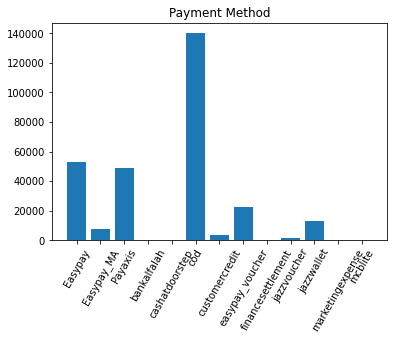

In [52]:
#payment method: 
method = promising.groupby('payment_method')['Customer ID'].count().to_frame().reset_index()

print(method)
#visualize: 
plt.bar(method['payment_method'],method['Customer ID'])
plt.title('Payment Method')
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#Save promising file to Excel: 
#promising.to_excel('promising.xlsx')

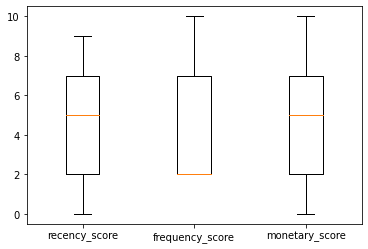

In [53]:
#Boxplot of Promising customer: 
re=rfm['recency_score']
fe=rfm['frequency_score']
mo= rfm['monetary_score']
columns = [re,fe,mo]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2,3],['recency_score','frequency_score','monetary_score'])
plt.show()

In [54]:
#Create dataframe contains only promising customer: 
promising = promising.loc[(promising['cluster']=='Promising Customer')]
promising = promising.rename(columns ={'grand_total_x':'grand_total'})
promising = promising.drop(['cluster'],axis =1)
promising  

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Month,Customer ID,new_payment_status,recency_score,monetary_score,count of others,frequency_score,total_score,sale amount
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,0.0,cod,1,15531,completed,0,8,22,9,17,250.0
4,379045,complete,2017-01-01,BP_PS03940-Green,349.0,1,599.0,100255236,School & Education,0.0,cod,1,15531,completed,0,8,22,9,17,349.0
7,379048,complete,2017-01-01,Wild_MicrotouchMaxTrimmer,550.0,1,920.0,100255239,Beauty & Grooming,0.0,cod,1,30119,completed,1,8,12,9,18,550.0
8,379049,complete,2017-01-01,Seven Star_SB-Cotton4,370.0,1,920.0,100255239,Home & Living,0.0,cod,1,30119,completed,1,8,12,9,18,370.0
9,379050,complete,2017-01-01,MYWALET_MW-060-BLACK,615.0,1,615.0,100255240,Men's Fashion,0.0,cod,1,18074,completed,2,8,11,9,19,615.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290914,724040,canceled,2017-12-31,COMKIN5A0C4788898C0,1562.0,1,1562.0,100441598,Computing,0.0,cod,12,74648,canceled,0,8,5,8,16,1562.0
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,0.0,cod,12,62383,canceled,0,9,76,9,18,12551.0
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,292.1,Easypay_MA,12,14025,canceled,0,9,24,9,18,998.0
290918,724057,canceled,2017-12-31,KNO59D64DAC18B6C,27.0,1,725.0,100441604,Superstore,7.9,Easypay_MA,12,14025,canceled,0,9,24,9,18,27.0


In [55]:
promising['category_name_1'].unique()

array(['Kids & Baby', 'School & Education', 'Beauty & Grooming',
       'Home & Living', "Men's Fashion", 'Mobiles & Tablets', 'Soghaat',
       'Health & Sports', 'Superstore', 'Appliances', "Women's Fashion",
       'Computing', 'Others', '\\N', 'Entertainment', 'Books'],
      dtype=object)

In [56]:
#filter missing data:
promising.dropna()
#Drop \\N: 
promising=promising.drop(promising.loc[(promising['category_name_1']=='\\N')].index, axis=0)

In [57]:
#Create dataframe with no duplicate incremental_id: data2 = data2[~data2['increment_id'].duplicated()]
promising_unique = promising
promising_unique= promising_unique[~promising_unique['increment_id'].duplicated()]
promising_unique

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Month,Customer ID,new_payment_status,recency_score,monetary_score,count of others,frequency_score,total_score,sale amount
3,379044,complete,2017-01-01,BO_nonRC-Jeep-Red,250.0,1,599.0,100255236,Kids & Baby,0.0,cod,1,15531,completed,0,8,22,9,17,250.0
7,379048,complete,2017-01-01,Wild_MicrotouchMaxTrimmer,550.0,1,920.0,100255239,Beauty & Grooming,0.0,cod,1,30119,completed,1,8,12,9,18,550.0
9,379050,complete,2017-01-01,MYWALET_MW-060-BLACK,615.0,1,615.0,100255240,Men's Fashion,0.0,cod,1,18074,completed,2,8,11,9,19,615.0
11,379052,order_refunded,2017-01-01,KureshiC_047-kemei,1099.0,1,1099.0,100255242,Beauty & Grooming,0.0,cod,1,15442,canceled,2,9,11,9,20,1099.0
12,379053,complete,2017-01-01,tucano_Plus Glass Protector for iPhone 6s IPH...,645.0,1,645.0,100255243,Mobiles & Tablets,0.0,cod,1,463,completed,5,7,4,8,20,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290913,724041,canceled,2017-12-31,MATHUA59B7EAAFBEF6B,29155.0,1,29155.0,100441597,Mobiles & Tablets,0.0,cod,12,8240,canceled,0,9,45,9,18,29155.0
290914,724040,canceled,2017-12-31,COMKIN5A0C4788898C0,1562.0,1,1562.0,100441598,Computing,0.0,cod,12,74648,canceled,0,8,5,8,16,1562.0
290916,724053,canceled,2017-12-31,MATHUA5A0C4EF0631F0,12551.0,1,12551.0,100441605,Mobiles & Tablets,0.0,cod,12,62383,canceled,0,9,76,9,18,12551.0
290917,724056,canceled,2017-12-31,MOR59F333319808D,499.0,2,725.0,100441604,Superstore,292.1,Easypay_MA,12,14025,canceled,0,9,24,9,18,998.0


       category_name_1  count item
0           Appliances       16515
1    Beauty & Grooming        9160
2                Books         416
3            Computing        4119
4        Entertainment        7823
5      Health & Sports        3098
6        Home & Living        7011
7          Kids & Baby        4435
8        Men's Fashion       21290
9    Mobiles & Tablets       32310
10              Others        1977
11  School & Education         629
12             Soghaat        7341
13          Superstore       16035
14     Women's Fashion       16468


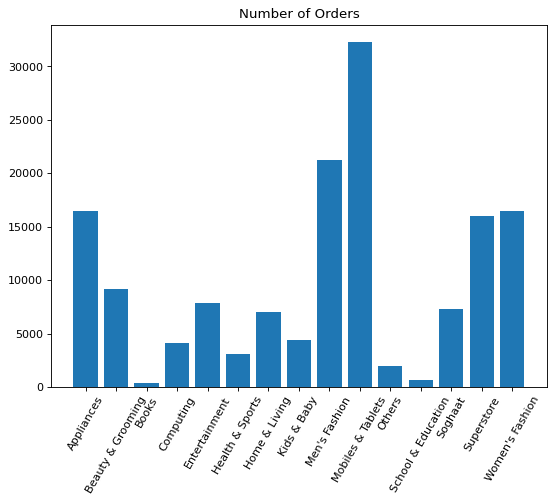

In [58]:
#What product Promising custermers buy the most?:
pivot_promising = promising.groupby('category_name_1')['item_id'].count().to_frame().reset_index().\
rename(columns={'item_id':'count item'})
print(pivot_promising)
#Visualize: 
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.bar(pivot_promising['category_name_1'],pivot_promising['count item'])
plt.xticks(rotation =60)
plt.title('Number of Orders')
plt.show()

       category_name_1   grand_total
0           Appliances  1.414227e+08
1    Beauty & Grooming  9.574412e+06
2                Books  1.732664e+05
3            Computing  3.894318e+07
4        Entertainment  1.400376e+08
5      Health & Sports  4.219960e+06
6        Home & Living  7.358454e+06
7          Kids & Baby  3.044499e+06
8        Men's Fashion  2.068456e+07
9    Mobiles & Tablets  5.483833e+08
10              Others  4.863184e+06
11  School & Education  4.037994e+05
12             Soghaat  3.324294e+06
13          Superstore  8.363980e+06
14     Women's Fashion  2.952136e+07


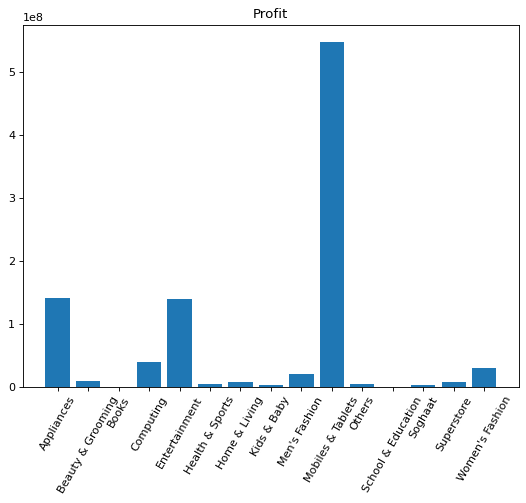

In [59]:
#Which category generate the most profit? 
pivot_u_pro = promising_unique.groupby('category_name_1')['grand_total'].sum().\
to_frame().reset_index()
print(pivot_u_pro)
#Visualize: 
figure(figsize=(8, 6), dpi=80)
plt.bar(pivot_u_pro['category_name_1'],pivot_u_pro['grand_total'])
plt.xticks(rotation =60)
plt.title('Profit')
plt.show()

       category_name_1  discount_amount   grand_total
0           Appliances     1.512978e+07  1.414227e+08
1    Beauty & Grooming     4.106728e+05  9.574412e+06
2                Books     1.924590e+03  1.732664e+05
3            Computing     4.107939e+06  3.894318e+07
4        Entertainment     1.653921e+07  1.400376e+08
5      Health & Sports     1.514053e+05  4.219960e+06
6        Home & Living     2.720886e+05  7.358454e+06
7          Kids & Baby     1.016694e+05  3.044499e+06
8        Men's Fashion     7.124502e+05  2.068456e+07
9    Mobiles & Tablets     5.515305e+07  5.483833e+08
10              Others     2.995771e+04  4.863184e+06
11  School & Education     8.879003e+03  4.037994e+05
12             Soghaat     6.098248e+04  3.324294e+06
13          Superstore     6.801478e+05  8.363980e+06
14     Women's Fashion     1.243928e+06  2.952136e+07


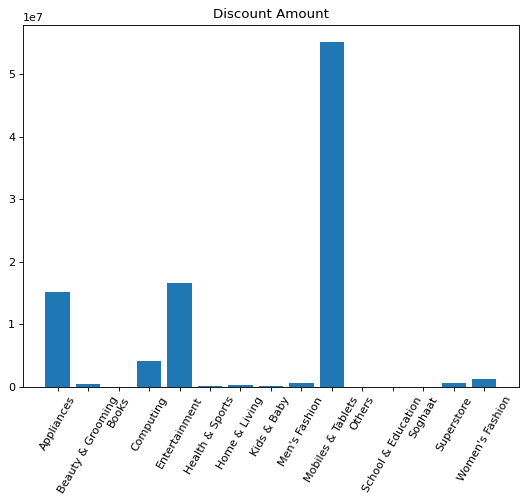

In [60]:
#Add Discount amount column into the dataframe: 
pivot_u_pro = pd.merge(promising_unique.groupby('category_name_1')['discount_amount'].sum().\
to_frame().reset_index(),pivot_u_pro, how ='inner',on='category_name_1')
print(pivot_u_pro)
#Visualize number of discount: 
figure(figsize=(8, 6), dpi=80)
plt.bar(pivot_u_pro['category_name_1'],pivot_u_pro['discount_amount'])
plt.xticks(rotation =60)
plt.title('Discount Amount')
plt.show()

    Month  increment_id
0       1          3687
1       2          2916
2       3          5207
3       4          4603
4       5          9286
5       6          4617
6       7          4544
7       8          6896
8       9          2981
9      10          7626
10     11         36242
11     12          4967


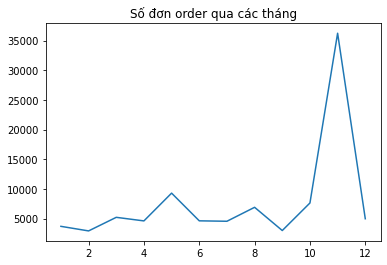

In [61]:
#Lượng đơn orders theo các tháng: 
order_month = promising_unique.groupby('Month')['increment_id'].count().to_frame().reset_index()
print(order_month)
#visualize: 
plt.plot(order_month['Month'], order_month['increment_id'])
plt.title('Số đơn order qua các tháng')
plt.show()

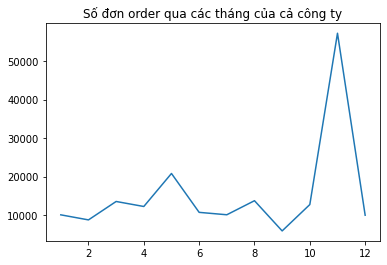

In [62]:
#lượng order theo các tháng của cả công ty: 
monthly_order = data2.groupby('Month')['increment_id'].count().to_frame().reset_index()
#visualize: 
plt.plot(monthly_order['Month'], monthly_order['increment_id'])
plt.title('Số đơn order qua các tháng của cả công ty')
plt.show()

<H1> Loyal Customer: 

In [63]:
loyal = pd.merge(data, rfm, how ='left', on = "Customer ID")
loyal = loyal.loc[loyal['cluster'] == 'Loyal Customer']
#Lọc trùng:
loyal_unique = loyal
loyal_unique= loyal_unique[~loyal_unique['increment_id'].duplicated()]
loyal_unique
loyal

,item_id,status,created_at,sku,price,qty_ordered,grand_total_x,increment_id,category_name_1,sales_commission_code,...,new_payment_status,last_day,recen_day,recency_score,grand_total_y,monetary_score,count of others,frequency_score,total_score,cluster
6,379047,complete,2017-01-01,Infinix-Hot-S-Grey,16899.0,1,15899.0,100255238,Mobiles & Tablets,HDD 105640,...,completed,2017-01-14,351 days,9,16748.00,7,2,6,22,Loyal Customer
10,379051,complete,2017-01-01,vitamin_Ultra Whey Protein,1500.0,1,1500.0,100255241,Health & Sports,\N,...,completed,2017-05-16,229 days,7,1041967.90,9,190,9,25,Loyal Customer
15,379058,complete,2017-01-01,AC_ac 178-green-Free size,799.0,1,48.0,100255246,Women's Fashion,\N,...,completed,2017-07-13,171 days,6,40085.00,8,15,9,23,Loyal Customer
21,379065,complete,2017-01-01,heater_De Longni,750.0,2,1500.0,100255251,Appliances,\N,...,completed,2017-09-17,105 days,4,169935.00,9,8,9,22,Loyal Customer
25,379072,order_refunded,2017-01-01,test-product,8.0,1,8.0,100255255,\N,\N,...,canceled,2017-05-29,216 days,6,101009.00,9,21,9,24,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222133,643125,canceled,2017-11-18,MATMOT59FC5E22CEBB4,18555.0,1,15555.0,100395461,Mobiles & Tablets,\N,...,canceled,2017-11-18,43 days,3,137766.19,9,23,9,21,Loyal Customer
222219,643226,refund,2017-11-18,APPANE59D491102F897,2083.0,1,676.3,100395525,Appliances,\N,...,canceled,2017-11-18,43 days,3,64262.40,9,14,9,21,Loyal Customer
222220,643227,refund,2017-11-18,APPWES59D48F1A93C9A,724.0,1,676.3,100395525,Appliances,\N,...,canceled,2017-11-18,43 days,3,64262.40,9,14,9,21,Loyal Customer
222355,643389,complete,2017-11-18,MATHUA5A0C4F9F219A6,28457.0,1,24957.0,100395611,Mobiles & Tablets,\N,...,completed,2017-11-18,43 days,3,317873.40,9,17,9,21,Loyal Customer


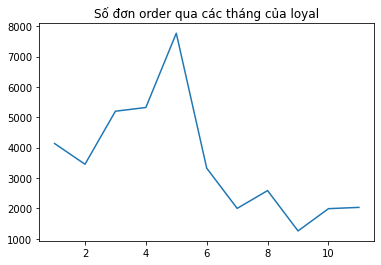

In [64]:
#lượng order theo các tháng của Loyal Customer: 
loyal_order = loyal_unique.groupby('Month')['increment_id'].count().to_frame().reset_index()
#visualize: 
plt.plot(loyal_order['Month'], loyal_order['increment_id'])
plt.title('Số đơn order qua các tháng của loyal')
plt.show()

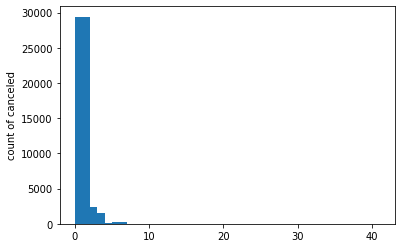

In [65]:
#Check huỷ đơn: 
number_can_loyal=all_in_one.loc[all_in_one['cluster'] == 'Loyal Customer']
number_can_loyal2 = number_can_loyal.loc[number_can_loyal['new_payment_status'] == 'canceled']
number_can_loyal2 =number_can_loyal2.groupby('qty_ordered')['item_id'].count().to_frame().reset_index().\
rename(columns={'item_id':'count of canceled'})
#visualize: 
plt.bar(number_can_loyal2['qty_ordered'],number_can_loyal2['count of canceled'], width = 2)
plt.ylabel('count of canceled')
plt.show()

In [67]:
number_can_loyal2.to_excel('count.xlsx')